# Cubic simplex splines on the Clough-Tocher split

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from SSplines import points_from_barycentric_coordinates, barycentric_coordinates, determine_sub_triangle, \
    sample_triangle

CT_BARYCENTRIC_COORDINATES = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1 / 3, 1 / 3, 1 / 3]
])

CT_SUB_TRIANGLE_VERTICES = np.array([
    [1, 2, 3],
    [1, 0, 3],
    [0, 1, 3]
])


def r(b):
    """
    Computes the cubic evaluation matrix for the CTS-basis
    on the Clough-Tocher split of a triangle.
    :param B: barycentric coordinates of point of evaluation
    :return:
    """
    R = np.zeros((3, 12))
    b0, b1, b2 = b
    
    R[:, 0] = np.repeat(b0 ** 3, 3)
    R[:, 3] = np.repeat(b1 ** 3, 3)
    R[:, 6] = np.repeat(b2 ** 3, 3)

    R[:, 1] = np.repeat(b0 ** 2 * b1, 3)
    R[:, 4] = np.repeat(b1 ** 2 * b2, 3)
    R[:, 7] = np.repeat(b2 ** 2 * b0, 3)

    R[:, 2] = np.repeat(b0 * b1 ** 2, 3)
    R[:, 5] = np.repeat(b1 * b2 ** 2, 3)
    R[:, 8] = np.repeat(b2 * b0 ** 2, 3)

    R[:, 9] = [
        3 * b0 ** 2 * b1 - b0 ** 3,
        3 * b0 * b1 ** 2 - b1 ** 3,
        6 * b0 * b1 * b2 - 3 * b0 * b2 ** 2 - 3 * b1 * b2 ** 2 + 2 * b2 ** 3
    ]

    R[:, 10] = [
        6 * b0 * b1 * b2 - 3 * b0 ** 2 * b1 - 3 * b0 ** 2 * b2 + 2 * b0 ** 3,
        3 * b1 ** 2 * b2 - b1 ** 3,
        3 * b1 * b2 ** 2 - b2 ** 3
    ]

    R[:, 11] = [
        3 * b0 ** 2 * b2 - b0 ** 3,
        6 * b0 * b1 * b2 - 3 * b0 * b1 ** 2 - 3 * b1 ** 2 * b2 + 2 * b1 ** 3,
        3 * b0 * b2 ** 2 - b2 ** 3
    ]

    return R


def ct_vertices(triangle):
    return points_from_barycentric_coordinates(triangle, CT_BARYCENTRIC_COORDINATES)


def ct_sub_triangles(triangle):
    return np.take(ct_vertices(triangle), CT_SUB_TRIANGLE_VERTICES)


def determine_sub_triangle_ct(B):
    """
    Given a set of barycentric coordinates, determines the integer k such that the
    point lies in subtriangle k of the CT-split.
    :param B: barycentric coordinates
    :return:
    """

    k = determine_sub_triangle(B)
    index_lookup_table = {0: 1, 1: 2, 2: 2, 3: 0, 4: 0, 5: 1, 6: 1, 7: 2, 8: 2, 9: 0, 10: 0, 11: 1}

    return np.vectorize(index_lookup_table.get)(k).astype(np.int)


# Cubic CTS-basis

In [13]:
    t = np.array([
        [0, 0],
        [1, 0],
        [0.5, np.sqrt(3)/2]
    ])
    p = sample_triangle(t, 40)
    
    def evaluate_ct_spline(x, c):
        
        z = np.zeros(len(p))

        for i in range(len(p)):
            x = p[i]
            bary_coords = barycentric_coordinates(t, x)
            k = determine_sub_triangle_ct(bary_coords)
            R = r(bary_coords[0])

            z[i] = R[k, :].dot(c)
        return z

0


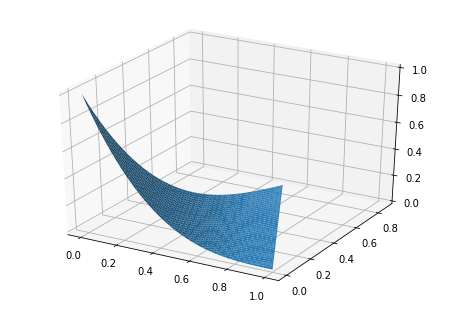

1


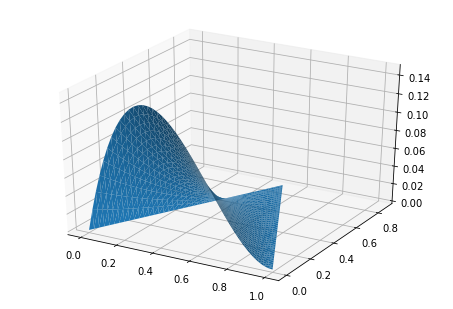

2


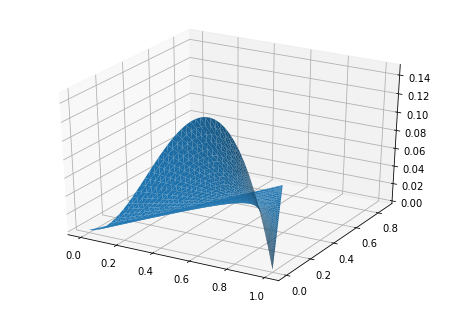

3


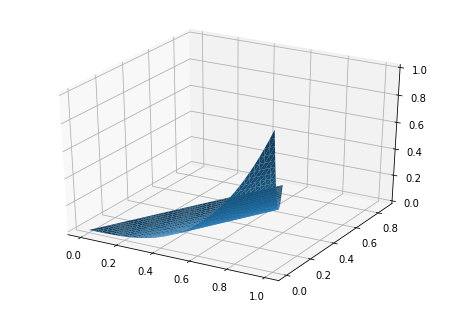

4


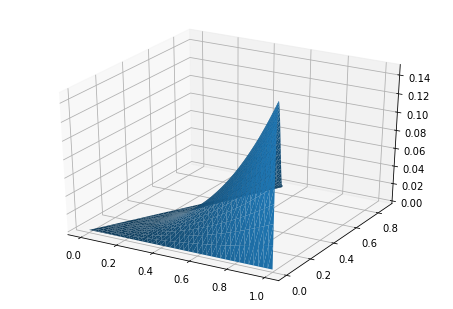

5


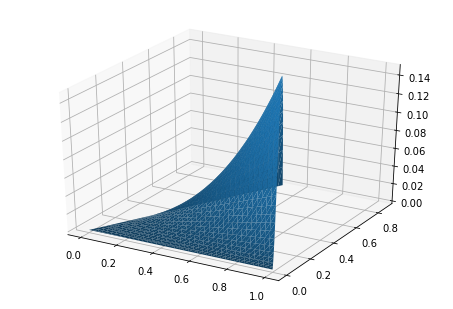

6


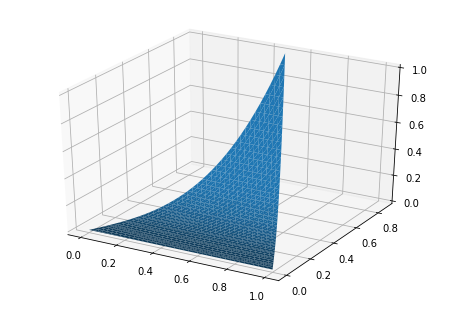

7


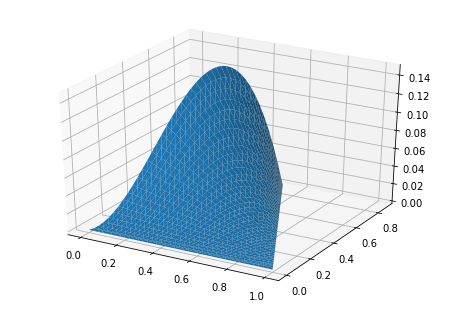

8


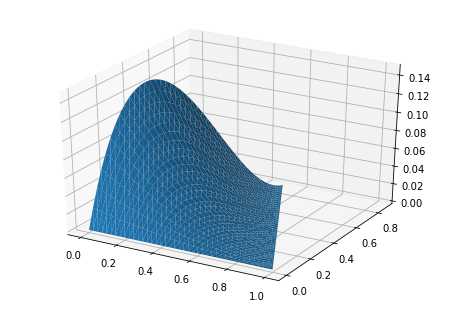

9


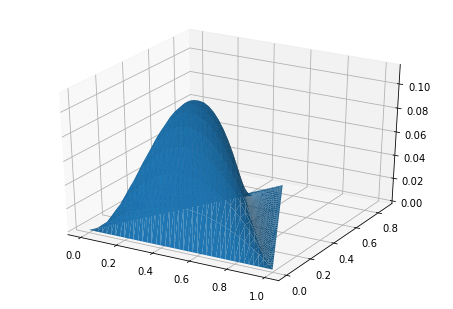

10


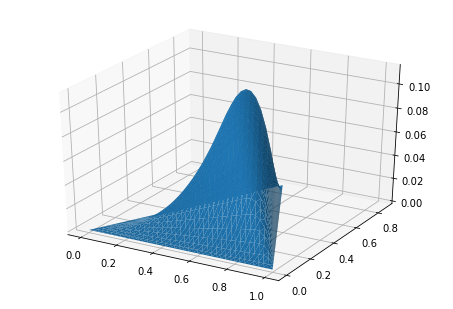

11


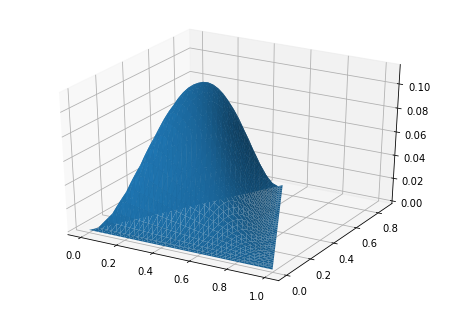

In [14]:
for i in range(12):
    print(i)
    c = np.array([i == j for j in range(12)])
    z = evaluate_ct_spline(p, c)

    fig = plt.figure()
    axs = Axes3D(fig)

    axs.plot_trisurf(p[:, 0], p[:, 1], z)
    plt.show()

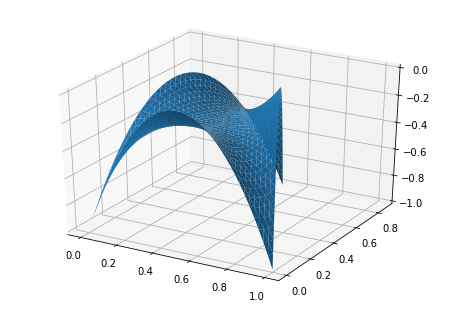

In [12]:
c = [-1, 1, 1, -1, 1, 1, -1, 1, 1, -1.5, -1.5, -1.5]
z = evaluate_ct_spline(p, c)

fig = plt.figure()
axs = Axes3D(fig)

axs.plot_trisurf(p[:, 0], p[:, 1], z)
plt.show()